In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
img = cv2.imread('set/cards/card226_b_1_f_o.jpg')
wb = cv2.xphoto.createGrayworldWB()
balanced_img = wb.balanceWhite(img)
cv2.imshow('Original Image', img)
cv2.imshow('Balanced Image', balanced_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [278]:
def detect_color(src):
    # Extract the channels
    blue_channel = src[:,:,0]
    green_channel = src[:,:,1]
    red_channel = src[:,:,2]

    center_column_index = blue_channel.shape[1] // 2

    blue_column = blue_channel[150:350, center_column_index]
    green_column = green_channel[150:350, center_column_index]
    red_column = red_channel[150:350, center_column_index]

    plt.figure()
    plt.plot(blue_column, "blue")
    plt.plot(green_column, "green")
    plt.plot(red_column, "red")
    
    blue_sum = sum(blue_column)
    green_sum = sum(green_column)
    red_sum = sum(red_column)

    print(f"blue_sum: {blue_sum}")
    print(f"green_sum: {green_sum}")
    print(f"red_sum: {red_sum}")

    if (blue_sum >= green_sum and blue_sum >= red_sum):
        return "b"
    elif (green_sum >= blue_sum and green_sum >= red_sum):
        return "g"
    else:
        return "r"

In [276]:
def detect_amount(gray_image):
    MIN_OBJECT_LENGTH = 50

    blurred_image = cv2.GaussianBlur(gray_image, (25,25), 3)

    # binarize image
    ret, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # get a vertical array of pixels in the center of the image
    center_column_index = binarized_image.shape[1] // 2
    center_column = binarized_image[:, center_column_index]

    zero_counter = 0
    small_row = 0
    amount = 0
    for i in range(len(center_column)):
        if (center_column[i] == 0): # counting zeros
            zero_counter += 1
        elif (zero_counter > 0): # row of zeros has reached its end
            # checking how long the row of zeros was
            
            # case 1: long row of zeros. before this was not a single small row
            if (zero_counter > MIN_OBJECT_LENGTH and small_row == 0):
                amount += 1
            # case 2: small row of zeros.
            elif (zero_counter < MIN_OBJECT_LENGTH):
                if (small_row == 0):
                    small_row += 1
                elif (small_row == 1):
                    amount += 1
                    small_row = 0
                else: 
                    print("error 8493")
            # case 3: else. Error
            else:
                print("error 9483")
                
            zero_counter = 0

    plt.figure()
    plt.imshow(binarized_image, cmap='gray')
    plt.vlines(center_column_index, 0, len(center_column), "red")

    plt.figure()
    plt.plot(center_column, "red")

    return amount

2

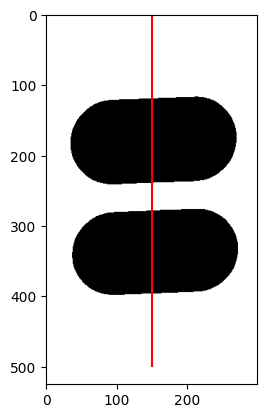

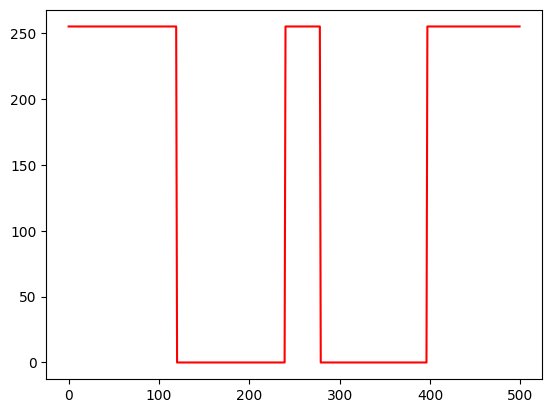

In [277]:
# Read the color image as a grayscale image
gray_image = cv2.imread("set/cards/card233_b_2_s_o.jpg", cv2.IMREAD_GRAYSCALE)

detect_amount(gray_image)

blue_sum: 15552
green_sum: 10299
red_sum: 11847


'b'

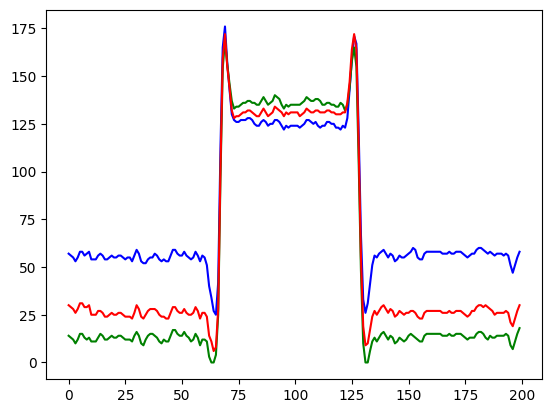

In [281]:
# Read the color image
img = cv2.imread('set/cards/card232_b_2_f_t.jpg')

# apply white balance
wb = cv2.xphoto.createGrayworldWB()
balanced_img = wb.balanceWhite(img)

detect_color(balanced_img)